# Strategie di vaccinazione

Confronto delle strategie di vaccinazione.

> Max Pierini

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import display, Markdown

# Abstract

> Dato un vaccino con efficacia $E_1$ in prima somministrazione
ed efficacia $E_2 > E_1$ in seconda somministrazione e sia 
impossibile vaccinare subito l'intera popolazione con la seconda dose
ma si possa vaccinare l'intera popolazione con la prima,
se il ritardo nella seconda somministrazione non diminuisce
$E_2$ al punto di avvicinarsi troppo alla soglia d'immunità di
gregge HIT, la migliore strategia dipende dal rapporto $E_1/E_2$:
se $E_1/E_2 < 0.5$ è più vantaggioso vaccinare tutta la popolazione
con la prima dose mentre se $E_1/E_2 > 0.5$ è più vantaggioso
vaccinare metà popolazione con le due dosi complete.
In caso $E_1/E_2 = 0.5$ le due strategie sono equiparabili
ma vaccinando metà popolazione con le due dosi si evita 
di perdere in efficacia e si protegge nel frattempo 
anche parte della popolazione non ancora vaccinata.
Se invece $E_2$ diminuisca portandosi troppo vicino
alla soglia HIT, è comunque più vantaggioso vaccinare
metà popolazione con entrambe le dosi così da non
rischiare di non poter raggiungere la minima copertura
vaccinale per immunità di gregge.


# Introduzione

Si presenta un'analisi delle probabilità medie di infezione in una popolazione con differenti strategie di vaccinazione laddove un vaccino abbia efficacia $E_1$ in prima somministrazione ed $E_2 > E_1$ in seconda somministrazione e non si possa vaccinare immediatamente l'intera popolazione.

***

Sia data una popolazione di $N$ soggetti in cui è in corso un'epidemia.

Viene sintentizzato un vaccino con efficacia $E_1$ alla prima somministrazione ed efficacia $E_2>E_1$ alla seconda somministrazione (senza limiti temporali rilevanti tra le due somministrazioni).

L'azienda farmaceutica ci informa che potrà inizialmente inviarci solo $N$ dosi (anziché $2N$ necessarie a vaccinare tutta la popolazione con due dosi complete).

Ci domandiamo se sia più utile

1. vaccinare tutta la popolazione con una singola dose in attesa della seconda

2. vaccinare metà della popolazione con due dosi in attesa di poter vaccinare la restante

Supponiamo che ciascun soggetto abbia una probabilità a priori $p$ di infettarsi se viene in contatto con un soggetto infetto.

Data l'efficacia vaccinale, la probabilità di infettarsi di un individuo vaccinato è quindi pari a

$$
p_n = (1-E_n) p
$$

dove $n$ è il numero di dosi ricevute (1 o 2).

La probabilità di infettarsi $p[i]$ di un soggetto venuto a contatto con un soggetto che ha probabilità $p$ di essere infetto (perché a sua volta venuto in contatto con un soggetto sicuramente infetto) è pari al prodotto delle probabilità

$$
p[i] = p \cdot p = p^2
$$

# nessuna vaccinazione

Per fare un esempio, supponiamo che 

- $E_1=50\%$ ed $E_2=100\%$

- $N=10$

- che 2 soggetti siano venuti in contatto con un soggetto sicuramente infetto

- che ciascuno dei due soggetti venga in contatto con 4 soggetti suscettibili

![nessuna vaccinazione](dosi_vaccino1.png)

La probabilità media di osservare soggetti infetti nella popolazione senza vaccino nell'esempio è

$$
P_0 = \frac{2p + 8p^2}{10} = \frac{p + 4p^2}{5}
$$

Generalizzando e indicando con $I$ i soggetti venuti in contatto con soggetti sicuramente infetti possiamo dire che la probabilità media di osservare soggetti infetti nella popolazione è

$$
P_0 = \frac{ Ip + (N-I)p^2 }{ N }
$$

# strategia (1)

Vaccinando tutta la popolazione con una singola dose, la probabilità di essere infetto dei due soggetti venuti a contatto con un soggetto sicuramente infetto è $p_1=(1-E_1)p$ (nell'esempio pertanto $p\cdot0.5$). Un soggetto che venisse in contatto con un soggetto con questa probabilità avrà pertanto una probabilità di infettarsi pari al prodotto della sua probabilità a priori (data la vaccinazione) e della probabilità di essere infetto del soggetto con cui è venuto in contatto, che in questo caso sono uguali. Nell'esempio

$$
p[i] = p_1 p_1 = 0.25 \cdot p^2
$$

![strategia (1)](dosi_vaccino2.png)

La probabilità media della popolazione vaccinata con una dose nell'esempio è

$$
P_1 = \frac{2(p\cdot0.5) + 8(p^2\cdot0.25)}{10} = \frac{p + 2p^2}{10}
$$

Generalizzando possiamo dire che

$$
P_1 = \frac{I (1-E_1) p + (N-I) (1-E_1)^2 p^2}{N}
$$

# strategia (2)

Vaccinando invece metà della popolazione con due dosi e supponendo che i contatti tra i soggetti siano equamente distribuiti, si avrebbe una situazione più eterogenea in cui alcuni soggetti sarebbero protetti con efficacia massimo $E_2$ (100% nell'esempio) e quindi con probabilità di infezione $p_2=(1-E_2)p$ mentre altri avrebbero una probabilità pari all'assenza di vaccinazione

![strategia (2)](dosi_vaccino3.png)

La probabilità media di infezione della popolazione vaccinata a metà con due dosi nell'esempio è perciò

$$
P_2 = \frac{p + 2p^2}{10}
$$

La generalizzazione di questa strategia necessita la suddivisione in 5 compartimenti.

Il primo compartimento è quello degli $I$ soggetti venuti a contatto con un soggetto sicuramente infetto.

Gli altri quattro compartimenti di $\frac{N-I}{4}$ soggetti (considerando che siano equamente distribuiti) sono i soggetti venuti in contatto con gli individui del primo compartimento.

## Compartimento 1

> Soggetti venuti a contatto con un soggetto sicuramente infetto

In questo caso metà dei soggetti $I$ non sono vaccinati, quindi la loro probabilità di infettarsi è pari a $p$ mentre l'altra metà è vaccinata con efficacia $E_2$, pertanto la somma delle probabilità di questi soggetti sarà

$$
P_{2,1} = \frac{I}{2}p + \frac{I}{2}(1-E_2)p = \frac{I}{2}(2-E_2)p
$$

## Compartimento 2

> Soggetti non vaccinati venuti in contatti con soggetti non vaccinati del primo compartimento

In questo caso, ciascun soggetto avrà probabilità di infettarsi pari al prodotto delle probabilità a priori $p$, pertanto la somma delle loro probabilità sarà

$$
P_{2,2} = \frac{N-I}{4}p^2
$$

## Compartimento 3

> Soggetti vaccinati venuti in contatto con soggetti non vaccinati del primo compartimento

La probabilità di ciascun soggetto sarà pari al prodotto della probabilità a priori $p$ dei soggetti del primo compartimento e della probabilità di infettarsi con seconda dose di vaccino di efficacia $E_2$, dunque la loro somma sarà

$$
P_{2,3} = \frac{N-I}{4} (1-E_2)p^2
$$

Notiamo che se $E_2=100\%$ la probabilità è nulla.

## Compartimento 4

> Soggetti non vaccinati venuti in contatto con soggetti vaccinati del primo compartimento

Similmente, la probabilità di ciascun soggetto sarà pari al prodotto della probabilità di infettarsi del soggetto del primo compartimento con vaccino di efficacia $E_2$ e della probabilità a priori $p$ di infettarsi, pertanto la loro somma sarà

$$
P_{2,4} = \frac{N-I}{4}(1-E_2)p^2
$$

Anche in questo caso se $E_2=100\%$ la probabilità è nulla.

## Compartimento 5

> Soggetti vaccinati venuti in contatto con soggetti vaccinati del primo compartimento

In quest'ultimo compartimento, la probabilità di ciascun soggetto sarà pari al prodotto della probabilità di infettarsi del soggetto del primo compartimento con vaccino di efficacia $E_2$ e della probabilità di infettarsi dei soggetti con medesima vaccinazione di efficacia $E_2$, pertanto la loro somma sarà

$$
P_{2,5} = \frac{N-I}{4}(1-E_2)^2 p^2
$$

Anche in questo compartimento se $E_2=100\%$ la probabilità è nulla.

## MEDIA

Dalla somma degli ultimi quattro compartimenti otteniamo

$$
\frac{N-I}{4} \left[ 1 + 2(1 - E_2) + (1-E_2)^2 \right] p^2 =
\frac{N-I}{4} (2 - E_2)^2 p^2
$$

Pertanto la media di tutti compartimenti, ovvero la probabilità media di osservare soggetti infetti nella popolazione, risulta

$$
P_2 = \frac{ \frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2 }{ N }
$$

# Proporzione strategie

La proporzione $P^*$ tra la probabilità media $P_1$ della strategia 1 e la probabilità media $P_2$ della strategia 2 è definita da

$$
P^* = \frac{P_1}{P_2} =
\frac{I (1-E_1) p + (N-I) (1-E_1)^2 p^2}{\frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2}
$$

è pertanto dimostrabile che $P^* = 1$, ovvero le due strategie sono equiparabili, se e solo se $E_1 = 0.5 \cdot E_2$ ovvero se l'efficacia della prima somministrazione è pari a metà dell'efficacia della seconda somministrazione.

Infatti, per $E_1 = 0.5 \cdot E_2$

$$
P^* = \frac{P_1}{P_2} =
\frac{I (1-0.5 \cdot E_2) p + (N-I) (1-0.5 \cdot E_2)^2 p^2}{\frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2}
$$

da cui

$$
P^* = \frac{P_1}{P_2} =
\frac{\frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2}{\frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2} = 1
$$

Per $E_1 \neq 0.5 \cdot E_2$, indicando $E_1 = (0.5 + x) E_2$ dove $-0.5 < x < 0.5$ 

$$
P^* = \frac{P_1}{P_2} =
\frac{I (1 - (0.5 + x) E_2) p + (N-I) (1 - (0.5 + x) E_2)^2 p^2}{\frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2}
$$

da cui

$$
P^* = \frac{P_1}{P_2} =
\frac{\frac{I}{2}(2 - E_2 - 2xE_2)p + \frac{N-I}{4} (2 - E_2 - 2xE_2)^2 p^2}{\frac{I}{2}(2 - E_2)p + \frac{N-I}{4} (2 - E_2)^2 p^2}
$$

e risulta evidente che 

- $x>0 \Rightarrow P^*<1$, ovvero se l'efficacia in prima dose è maggiore della metà dell'efficacia in seconda dose, $P_1 < P_2$ ed è più vantaggioso vaccinare tutta la popolazione con la prima dose (strategia 1)

- $x<0 \Rightarrow P^*>1$, ovvero se l'efficacia in prima dose è minore della metà dell'efficacia in seconda dose, $P_1 > P_2$ ed è più vantaggioso vaccinare metà popolazione con le due dosi (strategia 2)

- $x=0 \Rightarrow P^*=1$, ovvero se l'efficacia in prima dose è uguale alla metà dell'efficacia in seconda dose, le due strategie sono equiparabili

In [2]:
prevalence = .2
p = .9
N = 4e7
I = N * prevalence

P0 = (I * p + (N - I) * (p**2)) / N

In [3]:
length = 1000

In [4]:
def compute_P(prop=.25):

    E2 = np.linspace(0, 1, length)
    P2 = ((I / 2) * (2 - E2) * p + ((N - I) / 4) * ((2 - E2)**2) * (p**2)) / N
    E1 = E2 * prop
    P1 = (I * (1 - E1) * p + (N - I) * ((1 - E1)**2) * (p**2)) / N
    
    return P1, P2

In [5]:
def compute_P1_P2(E1, E2):

    P2 = ((I / 2) * (2 - E2) * p + ((N - I) / 4) * ((2 - E2)**2) * (p**2)) / N

    P1 = (I * (1 - E1) * p + (N - I) * ((1 - E1)**2) * (p**2)) / N
    
    return P1, P2, E1 / E2

In [6]:
def compute_ratio(props):
    p1, p2 = compute_P(props)
    return p1 / p2

In [7]:
props = np.linspace(0, 1, length)
ratios = compute_ratio(props)

In [26]:
max_P = np.max(ratios)

max_p = props[np.argmax(ratios)]

max_p2 = max_p + .5

max_P2 = ratios[np.isclose(props, max_p2, rtol=.001).nonzero()[0][0]]

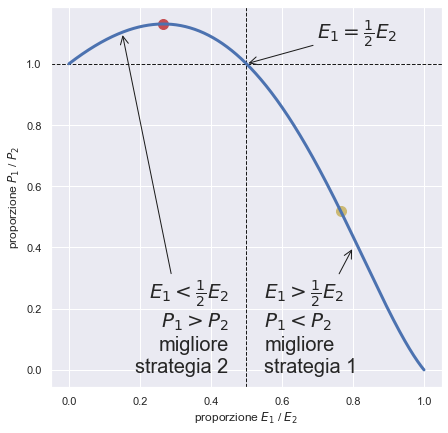

In [30]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.axvline(.5, color='k', ls='--', lw=1)
ax.axhline(1, color='k', ls='--', lw=1)
ax.plot(props, ratios, lw=3)

ax.annotate(
    r'$E_1 < \frac{1}{2}E_2$'
    '\n$P_1 > P_2$'
    '\nmigliore\nstrategia 2',
    xy=(.15, 1.1),
    xytext=(.45, .3),
    fontsize=20,
    ha='right', va='top',
    arrowprops=dict(color='k', arrowstyle='->')
)
ax.annotate(
    r'$E_1 > \frac{1}{2}E_2$'
    '\n$P_1 < P_2$'
    '\nmigliore\nstrategia 1',
    xy=(.8, .4),
    xytext=(.55, .3),
    fontsize=20,
    ha='left', va='top',
    arrowprops=dict(color='k', arrowstyle='->')
)
ax.annotate(
    r'$E_1 = \frac{1}{2}E_2$',
    xy=(.5, 1),
    xytext=(.7, 1.15),
    fontsize=20,
    ha='left', va='top',
    arrowprops=dict(color='k', arrowstyle='->')
)

ax.scatter(max_p, max_P, s=100, color='r')
ax.scatter(max_p2, max_P2, s=100, color='y')

ax.set(
    xlabel='proporzione $E_1$ / $E_2$',
    ylabel='proporzione $P_1$ / $P_2$'
)
plt.show()

In [29]:
display(Markdown(fr"""
Notiamo inoltre dal grafico di $P^*$ in funzione di $E_1 / E_2$ che la maggior 
efficacia della strategia 2 in caso di $E_1 < 0.5 \cdot E_2$ (ovvero $x<0$) è limitata superiormente a 
circa {max_P-1:.0%} quando $E_1 \simeq {max_p:.2f} \cdot E_2$ ovvero quando l'efficacia
del vaccino in prima dose è pari al {max_p:.0%} circa dell'efficacia in seconda dose
(punto rosso in figura),
mentre laddove $E_1 > 0.5 \cdot E_2$ il vantaggio della prima strategia
è notevolmente aumentato infatti ad esempio per $E_1 = (0.5+{max_p:.2f}) E_2 = {max_p2:.2f} \cdot E_2$,
il vantaggio della prima strategia è del {1-max_P2:.0%} circa quindi più che triplicato
(punto giallo in figura).
"""))


Notiamo inoltre dal grafico di $P^*$ in funzione di $E_1 / E_2$ che la maggior 
efficacia della strategia 2 in caso di $E_1 < 0.5 \cdot E_2$ (ovvero $x<0$) è limitata superiormente a 
circa 13% quando $E_1 \simeq 0.27 \cdot E_2$ ovvero quando l'efficacia
del vaccino in prima dose è pari al 27% circa dell'efficacia in seconda dose
(punto rosso in figura),
mentre laddove $E_1 > 0.5 \cdot E_2$ il vantaggio della prima strategia
è notevolmente aumentato infatti ad esempio per $E_1 = (0.5+0.27) E_2 = 0.77 \cdot E_2$,
il vantaggio della prima strategia è del 48% circa quindi più che triplicato
(punto giallo in figura).


# conclusione

Riassumendo, dal punto di vista della probabilità media di infezione nella popolazione 

- per $E_1 = 0.5 \cdot E_2$ le due strategie sono sovrapponibili

- per $E_1 > 0.5 \cdot E_2$ è più vantaggiosa la prima strategia

- per $E_1 < 0.5 \cdot E_2$ è più vantaggiosa la seconda strategia

Se pertanto il rapporto tra l'efficacia $E_1$ e $E_2$ non sia noto con sicurezza, ma non lontano dal 50%, la strategia 2 della vaccinazione completa a metà popolazione è più vantaggiosa perché si eviterebbe 
di perdere in efficacia e in caso $E_2$ fosse prossima al 100%, metà dei soggetti non ancora vaccinati sarebbero protetti abbattendo il loro rischio di infezione molto al di sotto della probabilità a priori, mentre nel caso della strategia 1 della vaccinazione in prima dose a tutta la popolazione, tutti i soggetti avrebbero la medesima probabilità sicuramente non nulla di infettarsi e si perderebbe in efficacia $E_2$ alla seconda somministrazione.

In [11]:
E1_pfizer = .50
E2_pfizer = .95
prop_pfizer = E1_pfizer / E2_pfizer

P1_pfizer, P2_pfizer, prop_pfizer = compute_P1_P2(E1_pfizer, E2_pfizer)

In [12]:
display(Markdown(fr"""
Nel caso, ad esempio, di un vaccino con efficacia $E_1={E1_pfizer*100:.0f}$%
ed efficacia $E_2={E2_pfizer*100:.0f}$%, quindi con proporzione
$E_1 / E_2 = {prop_pfizer:.2f} > 0.5$
(come si evince dai dati della sperimentazione fase 3
del vaccino Pfizer Cominarty)
, sarebbe maggiormente efficace
la strategia 1 infatti otteniamo

$$
P_1 = {P1_pfizer*100:.1f}\%
$$

$$
P_2 = {P2_pfizer*100:.1f}\%
$$

ovvero con la strategia 2 avremmo il {P2_pfizer - P1_pfizer:.1%} di 
probabilità media di infezione in più nella popolazione.
"""))


Nel caso, ad esempio, di un vaccino con efficacia $E_1=50$%
ed efficacia $E_2=95$%, quindi con proporzione
$E_1 / E_2 = 0.53 > 0.5$
(come si evince dai dati della sperimentazione fase 3
del vaccino Pfizer Cominarty)
, sarebbe maggiormente efficace
la strategia 1 infatti otteniamo

$$
P_1 = 25.2\%
$$

$$
P_2 = 27.3\%
$$

ovvero con la strategia 2 avremmo il 2.1% di 
probabilità media di infezione in più nella popolazione.


In [13]:
E1_pfizerA = .40
E2_pfizerA = .95
prop_pfizerA = E1_pfizerA / E2_pfizerA

P1_pfizerA, P2_pfizerA, prop_pfizerA = compute_P1_P2(E1_pfizerA, E2_pfizerA)

In [14]:
display(Markdown(fr"""
Ma se l'efficacia $E_1$ fosse minore, ad esempio $E_1={E1_pfizerA*100:.0f}$%
con medesima efficacia $E_2={E2_pfizerA*100:.0f}$%, quindi con proporzione
$E_1 / E_2 = {prop_pfizerA:.2f} < 0.5$, sarebbe maggiormente efficace
la strategia 2 infatti otterremmo

$$
P_1 = {P1_pfizerA*100:.1f}\%
$$

$$
P_2 = {P2_pfizerA*100:.1f}\%
$$

ovvero con la strategia 1 avremmo il {P1_pfizerA - P2_pfizerA:.1%} di 
probabilità media di infezione in più nella popolazione.
"""))


Ma se l'efficacia $E_1$ fosse minore, ad esempio $E_1=40$%
con medesima efficacia $E_2=95$%, quindi con proporzione
$E_1 / E_2 = 0.42 < 0.5$, sarebbe maggiormente efficace
la strategia 2 infatti otterremmo

$$
P_1 = 34.1\%
$$

$$
P_2 = 27.3\%
$$

ovvero con la strategia 1 avremmo il 6.8% di 
probabilità media di infezione in più nella popolazione.


In [36]:
E1_pfizerB = .50
E2_pfizerB = .90
prop_pfizerB = E1_pfizerB / E2_pfizerB

P1_pfizerB, P2_pfizerB, prop_pfizerB = compute_P1_P2(E1_pfizerB, E2_pfizerB)

In [39]:
display(Markdown(fr"""
Parimenti, se l'efficacia $E_1={E1_pfizerB*100:.0f}\%$ fosse confermata, 
ma $E_2$ fosse minore ad esempio $E_2={E2_pfizerB*100:.0f}$%, quindi con proporzione
$E_1 / E_2 = {prop_pfizerB:.2f} > 0.5$, sarebbe maggiormente efficace
la strategia 1 infatti otterremmo

$$
P_1 = {P1_pfizerB*100:.1f}\%
$$

$$
P_2 = {P2_pfizerB*100:.1f}\%
$$

ovvero con la strategia 2 avremmo il {P2_pfizerB - P1_pfizerB:.1%} di 
probabilità media di infezione in più nella popolazione.
"""))


Parimenti, se l'efficacia $E_1=50\%$ fosse confermata, 
ma $E_2$ fosse minore ad esempio $E_2=90$%, quindi con proporzione
$E_1 / E_2 = 0.56 > 0.5$, sarebbe maggiormente efficace
la strategia 1 infatti otterremmo

$$
P_1 = 25.2\%
$$

$$
P_2 = 29.5\%
$$

ovvero con la strategia 2 avremmo il 4.3% di 
probabilità media di infezione in più nella popolazione.


Pertanto, nel caso in cui un ritardo nella somministrazione della seconda dose diminuisse l'efficacia $E_2$, restando invariata l'efficacia della prima dose $E_1$, al punto che il rapporto $E_1 / E_2 > 0.5$ sarebbe preferibile la strategia 1, ovvero vaccinare l'intera popolazione con la prima somministrazione.

È dunque evidente che la scelta della migliore strategia dal punto di vista probabilistico, considerando equamente distribuiti i contatti tra i soggetti e condivisa la probabilità $p$ a priori di infettarsi in caso di contatto, dipende dal rapporto tra l'efficacia delle due somministrazioni e dall'eventuale diminuzione dell'efficacia della seconda somministrazione dovuta al ritardo.

Se però la riduzione dell'efficacia $E_2$ fosse eccessiva al punto da avvicinarsi troppo alla soglia dell'immunità di gregge, la strategia 2 sarebbe comunque preferibile nonostante rischi di aumentare la probabilità di infetti nella popolazione se $E_1/E_2>0.5$.

Infatti, la minima copertura vaccinale $V$, dato il numero di riproduzione di base $R_0$ è pari a 

$$
V = \frac{ 1 - \frac{1}{R_0} }{ E }
$$

dove $1 - \frac{1}{R_0}$ è la soglia di immunità di gregge **HIT** (Herd Immunity Threshold).

Se quindi $E < \mathbf{HIT}$, si dovrebbe vaccinare più del 100% della popolazione, il che è ovviamente impossibile.

Pertanto, se il ritardo nella seconda somministrazione diminuisce l'efficacia $E_2$, finché $E_2 > \mathbf{HIT}$ la scelta della strategia dipende dal rapporto $E_1 / E_2$, ma nel momento in cui $E_2 \simeq \mathbf{HIT}$ ovvero l'efficacia della seconda somministrazione di avvicini troppo alla soglia per effetto gregge, la strategia 1 sarebbe comunque da evitare per non perdere di efficacia e rischiare di non poter raggiungere la minima copertura vaccinale quando la seconda fornitura sarà disponibile per il resto della popolazione.